<a href="https://colab.research.google.com/github/ozgeirvanali/Proje1/blob/main/TransferLearning2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download Dataset


In [1]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2022-08-27 21:56:07--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.11.208.160, 2600:1407:2800:391::317f, 2600:1407:2800:38c::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.11.208.160|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M   113MB/s    in 6.9s    

2022-08-27 21:56:14 (114 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



Unzip the Dataset


In [2]:
!unzip kagglecatsanddogs_5340.zip

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  
  i

Import Modules


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import tqdm
import random
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')

Create Dataframe for Input and Output


In [4]:
input_path = []
label = []

for class_name in os.listdir("PetImages"):
    for path in os.listdir("PetImages/"+class_name):
        if class_name == 'Cat':
            label.append(0)
        else:
            label.append(1)
        input_path.append(os.path.join("PetImages", class_name, path))
print(input_path[0], label[0])

PetImages/Dog/8323.jpg 1


Create Dataframe for Input and Output


In [5]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

images  label
0   PetImages/Cat/7117.jpg      0
1    PetImages/Dog/376.jpg      1
2   PetImages/Dog/4161.jpg      1
3  PetImages/Cat/10496.jpg      0
4   PetImages/Cat/4494.jpg      0

In [6]:
for i in df['images']:
    if '.jpg' not in i:
        print(i)

PetImages/Cat/Thumbs.db
PetImages/Dog/Thumbs.db


In [7]:
import PIL
l = []
for image in df['images']:
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image)
l

['PetImages/Dog/11702.jpg',
 'PetImages/Cat/666.jpg',
 'PetImages/Cat/Thumbs.db',
 'PetImages/Dog/Thumbs.db']

In [8]:
# delete db files
df = df[df['images']!='PetImages/Dog/Thumbs.db']
df = df[df['images']!='PetImages/Cat/Thumbs.db']
df = df[df['images']!='PetImages/Cat/666.jpg']
df = df[df['images']!='PetImages/Dog/11702.jpg']
len(df)

24998

Resizing

In [9]:
from PIL import Image
import os, sys

path = "PetImages"
dirs = os.listdir( path )

def resize():
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            f, e = os.path.splitext(path+item)
            imResize = im.resize((200,200), Image.ANTIALIAS)
            imResize.save(f + ' resized.jpg', 'JPEG', quality=90)

resize()

**Normalization**

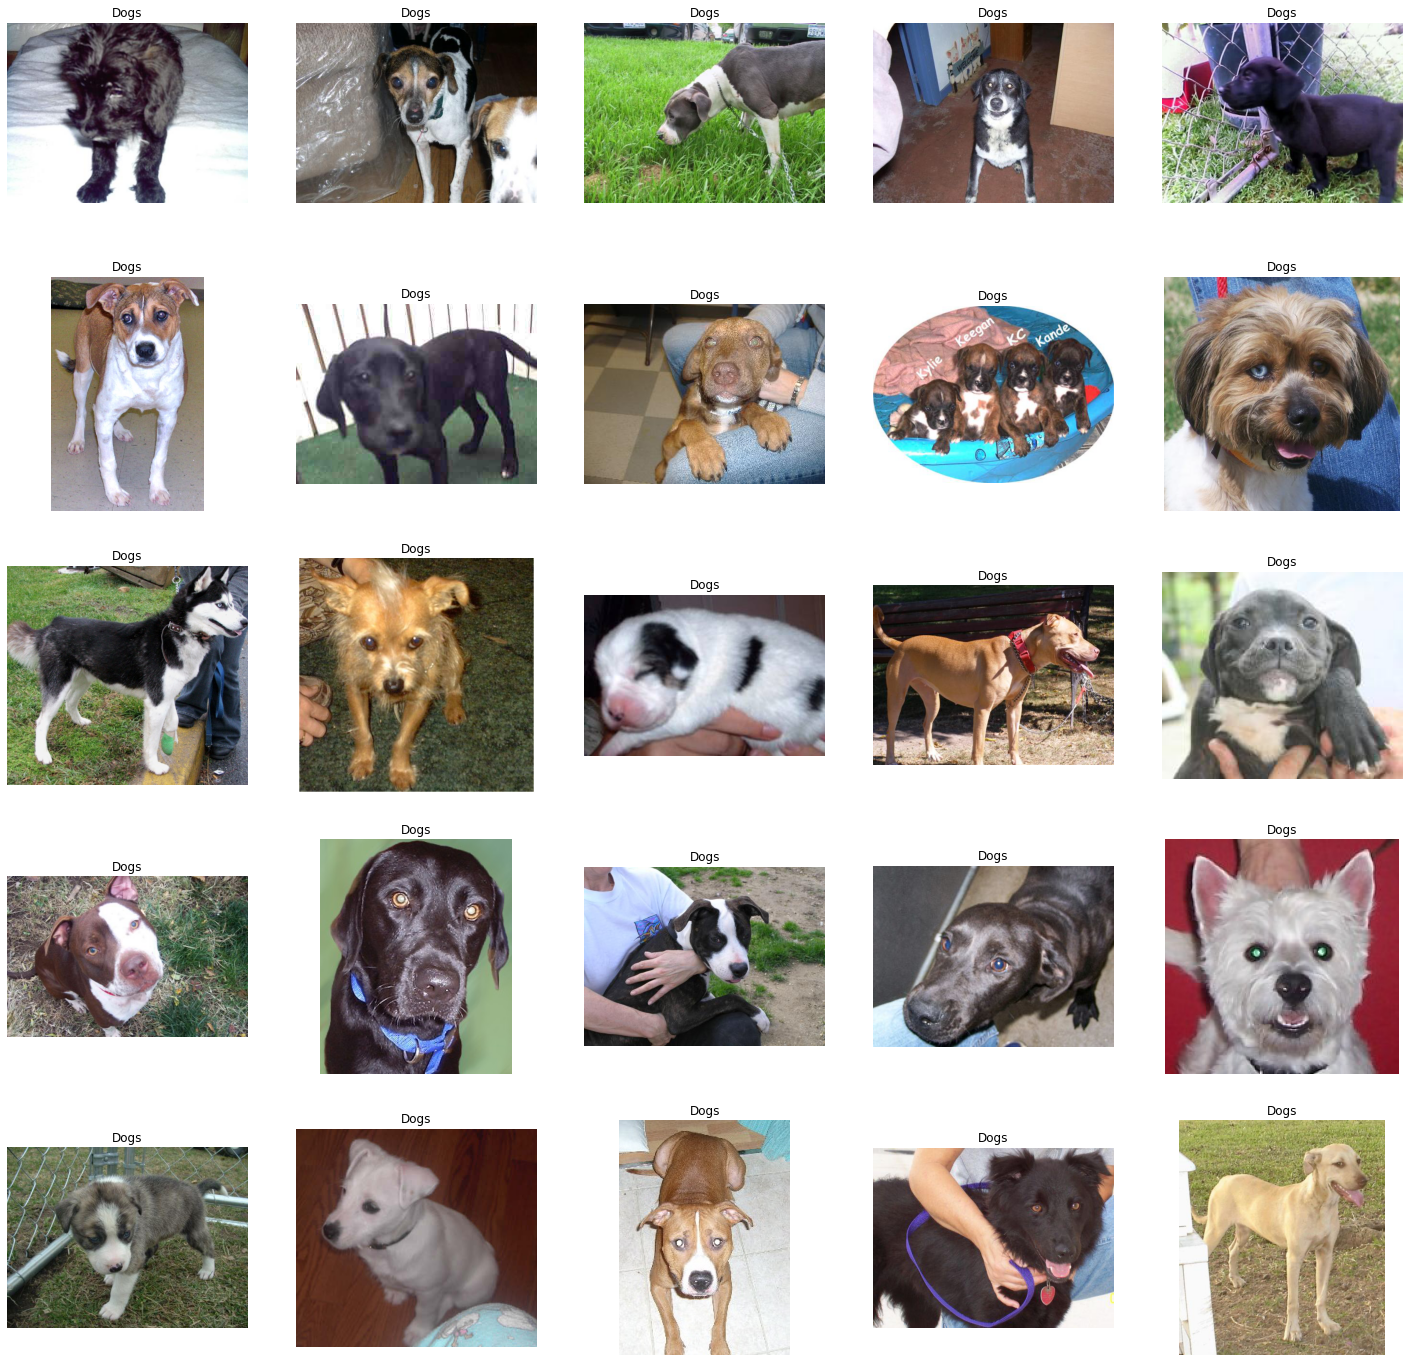

In [10]:
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Dogs')
    plt.axis('off')

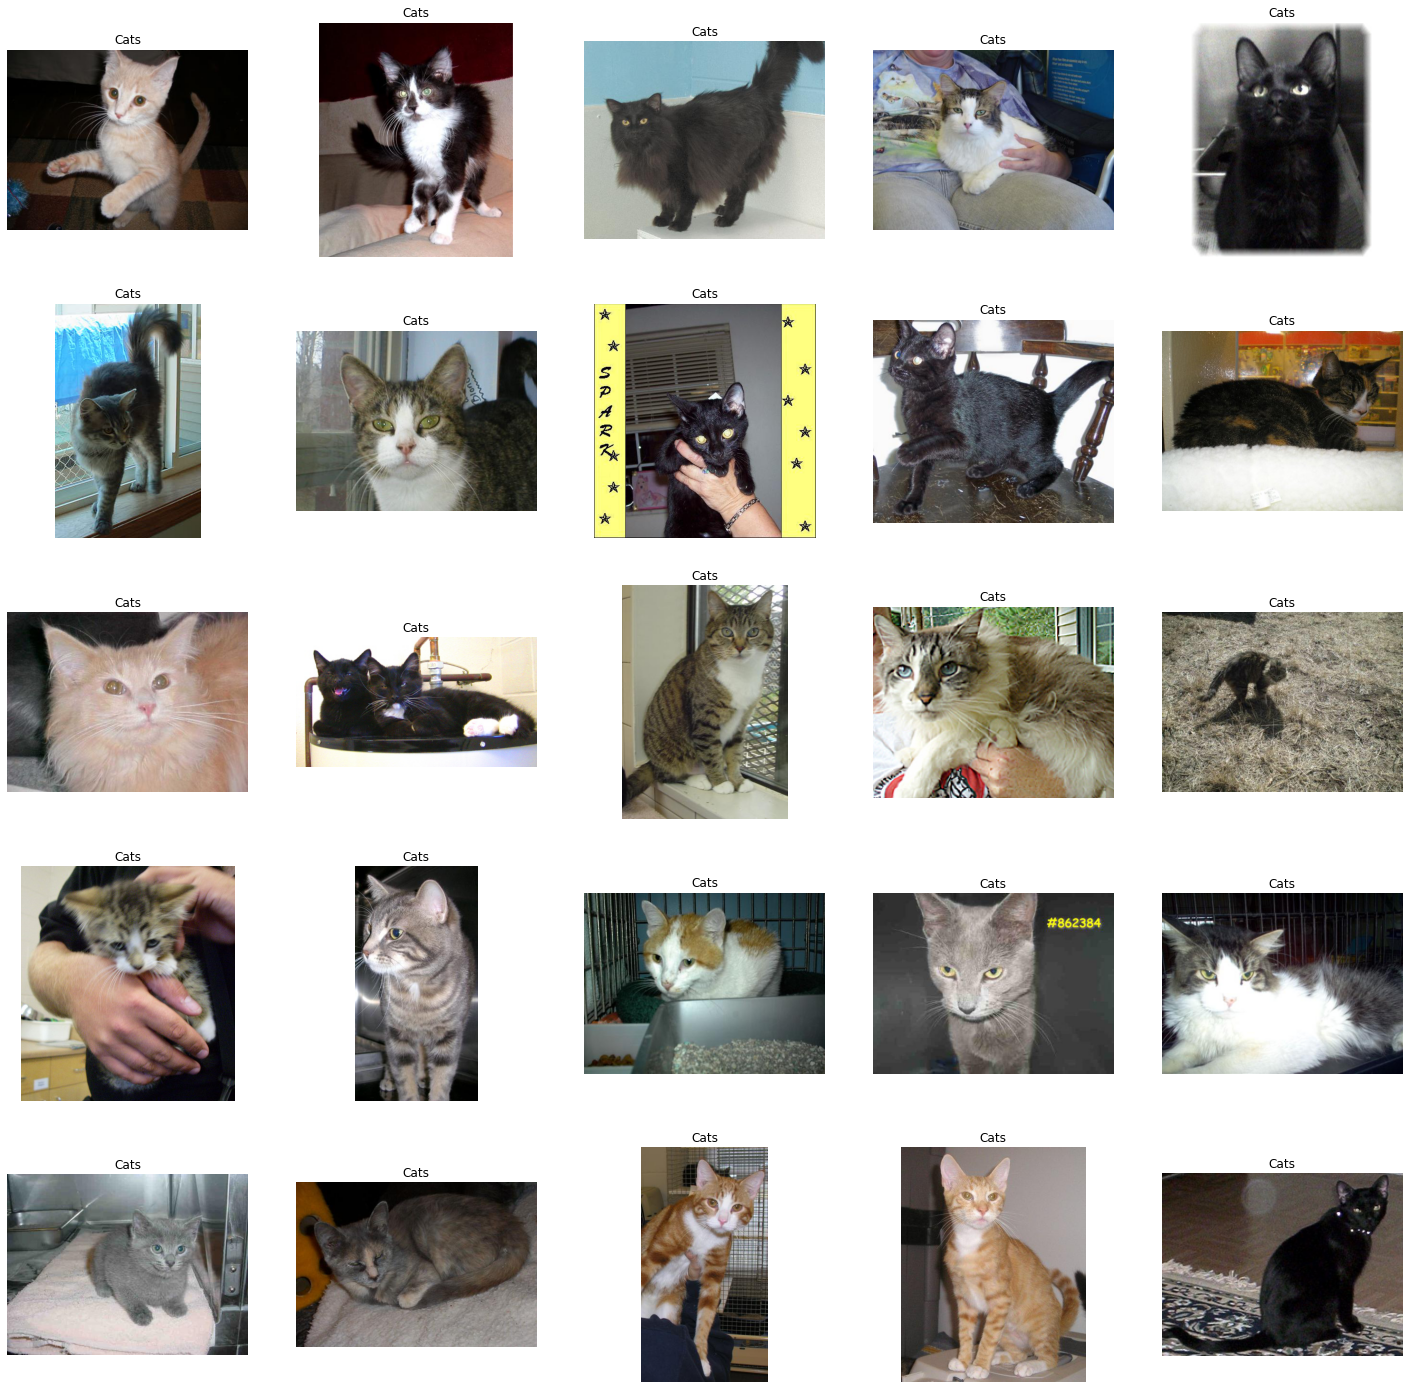

In [11]:
plt.figure(figsize=(25,25))
temp = df[df['label']==0]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Cats')
    plt.axis('off')

to display grid of images


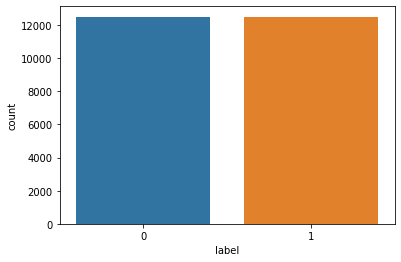

In [12]:
import seaborn as sns
sns.countplot(df['label'])

In [13]:
df['label'] = df['label'].astype('str')

In [14]:
df.head()

images label
0   PetImages/Cat/7117.jpg     0
1    PetImages/Dog/376.jpg     1
2   PetImages/Dog/4161.jpg     1
3  PetImages/Cat/10496.jpg     0
4   PetImages/Cat/4494.jpg     0

In [15]:
df

images label
0       PetImages/Cat/7117.jpg     0
1        PetImages/Dog/376.jpg     1
2       PetImages/Dog/4161.jpg     1
3      PetImages/Cat/10496.jpg     0
4       PetImages/Cat/4494.jpg     0
...                        ...   ...
24997   PetImages/Dog/3891.jpg     1
24998   PetImages/Dog/6606.jpg     1
24999  PetImages/Cat/10289.jpg     0
25000    PetImages/Dog/162.jpg     1
25001   PetImages/Cat/2326.jpg     0

[24998 rows x 2 columns]

In [16]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [17]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,  # normalization of images
    rotation_range = 40, # augmention of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=512, 
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=512, 
    class_mode='binary'
)

Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


Model Creation

In [18]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
                    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
                    MaxPool2D((2,2)),
                    Conv2D(32, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(1, activation='sigmoid')
])

In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [20]:
history = model.fit(train_iterator, epochs=10, validation_data=val_iterator)

Epoch 1/10
40/40 [==============================] - 442s 11s/step - loss: 0.8042 - accuracy: 0.5436 - val_loss: 0.6642 - val_accuracy: 0.5770
Epoch 2/10
40/40 [==============================] - 442s 11s/step - loss: 0.6394 - accuracy: 0.6313 - val_loss: 0.5933 - val_accuracy: 0.6842
Epoch 3/10
40/40 [==============================] - 436s 11s/step - loss: 0.6016 - accuracy: 0.6750 - val_loss: 0.5665 - val_accuracy: 0.7168
Epoch 4/10
40/40 [==============================] - 440s 11s/step - loss: 0.5615 - accuracy: 0.7126 - val_loss: 0.5494 - val_accuracy: 0.7198
Epoch 5/10
40/40 [==============================] - 432s 11s/step - loss: 0.5447 - accuracy: 0.7196 - val_loss: 0.5047 - val_accuracy: 0.7602
Epoch 6/10
40/40 [==============================] - 443s 11s/step - loss: 0.5196 - accuracy: 0.7422 - val_loss: 0.5270 - val_accuracy: 0.7344
Epoch 7/10
40/40 [==============================] - 436s 11s/step - loss: 0.4966 - accuracy: 0.7538 - val_loss: 0.4599 - val_accuracy: 0.7822
Epoch 

Visualization of Results

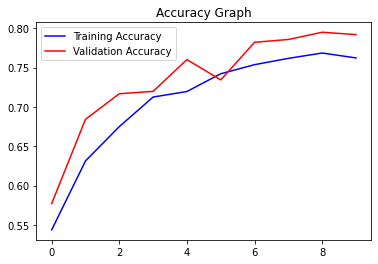

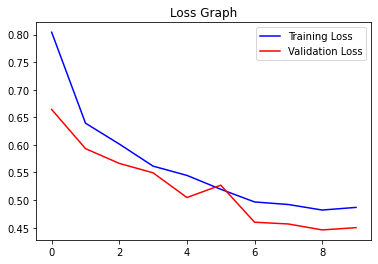

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()